# Codifiación, imputación y discretización.
# Algoritmos de Reducción de Dimensionalidad

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Para la codificacion ordinal y one-hot usando sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Para dividir el conjunto de datos
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('../../datasets/raw/fifa_players.csv')
data.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


# Para nuestro proyecto optamos por la codificación one-hot

In [8]:
from sklearn.model_selection import train_test_split

# Supongamos que ya has leído el dataset y lo has almacenado en la variable 'data'
# data = pd.read_csv('ruta/a/tu/dataset/Fifa_players.csv')

# Definir las características (X) y la etiqueta (y)
X = data.drop('overall_rating', axis=1)  # Características
y = data['overall_rating']  # Etiqueta

# Dividir los datos en conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mostrar el tamaño de los conjuntos
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

Tamaño del conjunto de entrenamiento: (12567, 50)
Tamaño del conjunto de prueba: (5387, 50)


Mean Squared Error: 41.63177186826007
            Player Name  Predicted Overall Rating
9834          S. Davies                 63.522629
5815   L. Ashby-Hammond                 63.522629
4093       G. McEachran                 63.522629
7476            Y. Goke                 62.598404
16455    Edercinho Sepa                 70.907079
6699         A. Fleming                 63.522629
6700        Y. Begraoui                 67.878671
3991           F. Myhre                 63.181971
14684         Y. Barbet                 67.878671
9194             S. Ito                 62.598404


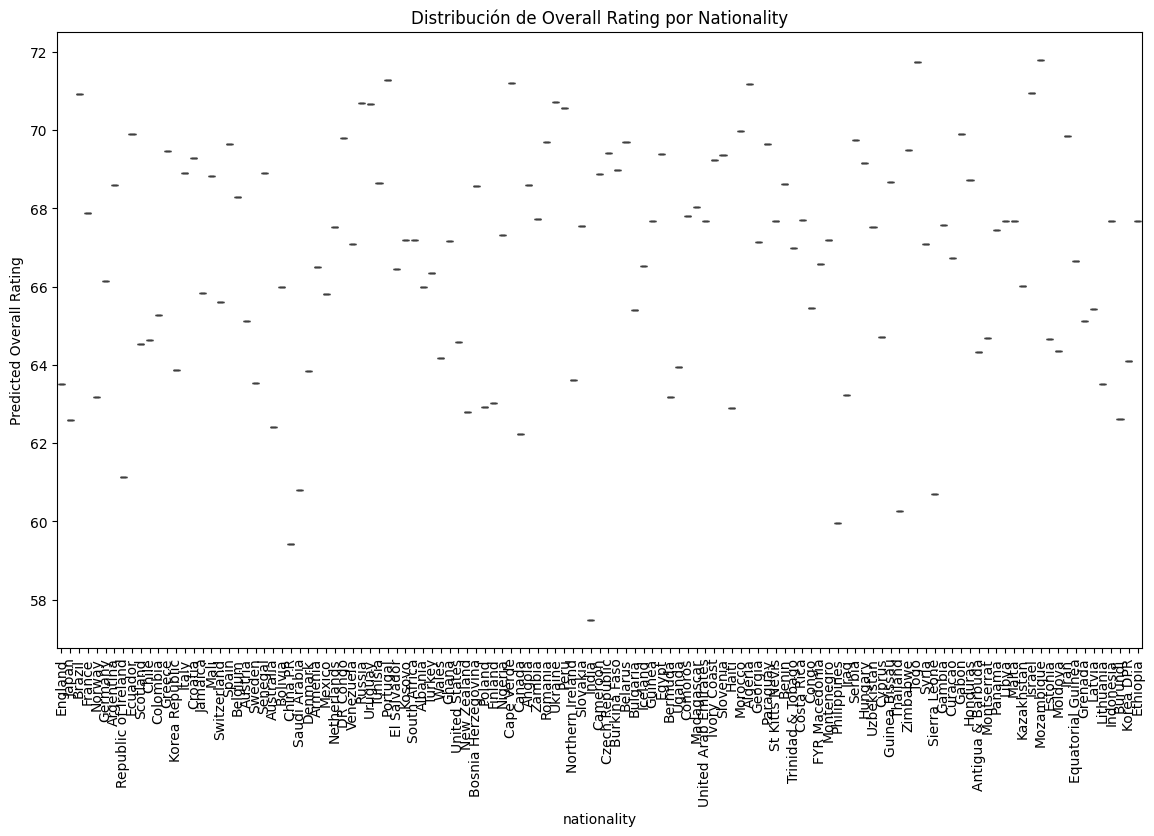

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya has leído el dataset y lo has almacenado en la variable 'data'
# data = pd.read_csv('ruta/a/tu/dataset/Fifa_players.csv')

# Definir las características (X) y la etiqueta (y)
X = data[['name', 'nationality']]  # Incluir las columnas 'name' y 'nationality'
y = data['overall_rating']  # Etiqueta que queremos predecir

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Guardar los nombres de los jugadores en el conjunto de prueba
player_names_test = X_test['name']

# Eliminar la columna 'name' antes de aplicar la codificación one-hot
X_train = X_train.drop(columns=['name'])
X_test = X_test.drop(columns=['name'])

# Crear un transformer para las columnas categóricas (One-Hot Encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['nationality'])
    ]
)

# Crear un pipeline que primero transforma los datos y luego entrena un modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Mostrar algunas de las primeras predicciones junto con los nombres de los jugadores
predictions = pd.DataFrame({
    'Player Name': player_names_test,
    'Predicted Overall Rating': y_pred
})
print(predictions.head(10))

# Agregar las predicciones a X_test para la gráfica
X_test['Predicted Overall Rating'] = y_pred



In [25]:
ohe_enc = OneHotEncoder(
    handle_unknown="infrequent_if_exist",  # categorías no vistas se tratarán como las menos frecuentes
    max_categories=5,  # el número máximo de categorías
    sparse_output=False,  
)

ohe_enc.set_output(transform="pandas")

ohe_enc.fit(X_train)

OneHotEncoder(handle_unknown='infrequent_if_exist', max_categories=5,
              sparse_output=False)

In [26]:
ohe_enc.infrequent_categories_

[array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia',
        'Austria', 'Azerbaijan', 'Barbados', 'Belarus', 'Belgium', 'Benin',
        'Bermuda', 'Bolivia', 'Bosnia Herzegovina', 'Brazil', 'Bulgaria',
        'Burkina Faso', 'Burundi', 'Cameroon', 'Canada', 'Cape Verde',
        'Central African Rep.', 'Chad', 'Chile', 'China PR', 'Colombia',
        'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao',
        'Cyprus', 'Czech Republic', 'DR Congo', 'Denmark',
        'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
        'Equatorial Guinea', 'Eritrea', 'Estonia', 'FYR Macedonia',
        'Faroe Islands', 'Fiji', 'Finland', 'Gabon', 'Gambia', 'Georgia',
        'Ghana', 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guinea',
        'Guinea Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong',
        'Hungary', 'Iceland', 'India', 'Iran', 'Iraq', 'Israel', 'Italy',
        'Ivory Coast', '

In [28]:
# Selecciona las columnas necesarias
data = data[['name', 'nationality', 'overall_rating']]

# Codificación One-Hot para 'nationality'
ohe_enc = OneHotEncoder(sparse_output=False, drop='first')  # Puedes usar 'drop='first'' para evitar multicolinealidad
encoded_nationalities = ohe_enc.fit_transform(data[['nationality']])

# Crear un DataFrame con las codificaciones
encoded_df = pd.DataFrame(encoded_nationalities, columns=ohe_enc.get_feature_names_out(['nationality']))

# Concatenar las codificaciones con el dataset original
encoded_data = pd.concat([data[['name', 'overall_rating']], encoded_df], axis=1)

# Dividir los datos en conjunto de entrenamiento y prueba
X = encoded_data.drop(columns=['name', 'overall_rating'])
y = encoded_data['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exploremos los resultados
print("Encabezado de X_train:")
print(pd.DataFrame(X_train).head())

print("Encabezado de X_test:")
print(pd.DataFrame(X_test).head())

Encabezado de X_train:
       nationality_Albania  nationality_Algeria  nationality_Andorra  \
15907                  0.0                  0.0                  0.0   
1320                   0.0                  0.0                  0.0   
316                    0.0                  0.0                  0.0   
10437                  0.0                  0.0                  0.0   
15245                  0.0                  0.0                  0.0   

       nationality_Angola  nationality_Antigua & Barbuda  \
15907                 0.0                            0.0   
1320                  0.0                            0.0   
316                   0.0                            0.0   
10437                 0.0                            0.0   
15245                 0.0                            0.0   

       nationality_Argentina  nationality_Armenia  nationality_Australia  \
15907                    0.0                  0.0                    0.0   
1320                     0.0   